### This file hof_monitor.ipynb pulls NFL Quarterback career data from https://www.pro-football-reference.com/hof/hofm_QB.htm 

Pro Football QB Hall of Fame Monitor
The Pro Football Reference Hall of Fame Monitor (HOFm) https://www.pro-football-reference.com/about/hof_monitor.htm is a metric designed to estimate a player's chances of making the Pro Football Hall of Fame using AV, Pro Bowls, All-Pros, championships, and various stat milestones. The players listed below are the top 250 HOFm-rated players who played QB starting in 1955 or later for at least 50 career games. A score of 100 is around the average modern-era inductee

In [ ]:
# HOFm: Hall of Fame Monitor score, indicates player's chance of election to Pro Football Hall of Fame for careers started after 1955. 100 is average hall of famer at player's position.
# Chmp: Times team won the Super Bowl or<br>before the Super Bowl the League Championship Game
# All-Pro 1st Team Selct.: <b>First-team all-pro selections</b>
# Pro Bowl Selct.: <b>Pro Bowl Selections</b>
# St: Number of years as primary starter for his team at his position
# From: First Year
# To: Last Year
# Approximate Value (Weighted): <b>Weighted Career Approximate Value</b>.<br>See the glossary for details on how we compute Approximate Value.<br>The career AV is computed by summing <br>100 percent of the AV of his best season,<br>95 percent of the AV of his next-best season,<br>90 percent of the AV of his third-best season,<br>and so on
# Games: Games played
# Games Started: Games started as an offensive or defensive player
# Passes Completed: Passes completed
# Pass Attempts: Passes attempted
# Passing Yds: Yards Gained by Passing<br>For teams, sack yardage is deducted from this total
# Passing TD: Passing Touchdowns
# Long Pass: Longest Completed Pass Thrown (complete since 1975)
# Passes Intercepted: Interceptions thrown
# Sacked : Times Sacked (official since 1969, complete NFL coverage since 1963, partial NFL coverage from 1960-62)
# Sacked Yds Lost: Yards lost due to sacks (official since 1969, complete NFL coverage since 1947)

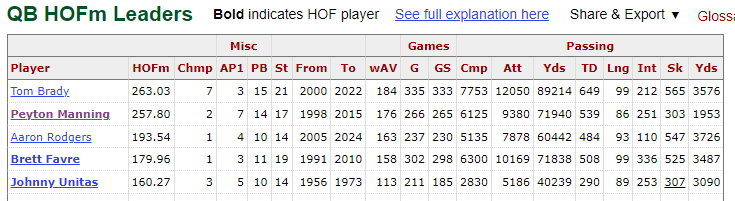

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

url = 'https://www.pro-football-reference.com/hof/hofm_QB.htm' 
# GET request to the URL
response = requests.get(url)
tables = {}

# Check if the request was successful
if response.status_code == 200:
    # Parse HTML content with BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')
    # Find all tables in the HTML content, print the number found.
    tables = soup.find_all('table')
    print(f"Number of tables found: {len(tables)}")

    # Iterate over all tables and print a snippet to identify the correct one
    for i, table in enumerate(tables):
        print(f"\nTable {i}:")
        print(table.prettify()[:1000])  # Print snippet of table
else:
    print(f"Failed to fetch the webpage. Status code: {response.status_code}")

Number of tables found: 1

Table 0:
<table class="sortable stats_table" data-cols-to-freeze="1,2" id="hof_players">
 <caption>
  QB HOFm Leaders Table
 </caption>
 <colgroup>
  <col/>
  <col/>
  <col/>
  <col/>
  <col/>
  <col/>
  <col/>
  <col/>
  <col/>
  <col/>
  <col/>
  <col/>
  <col/>
  <col/>
  <col/>
  <col/>
  <col/>
  <col/>
  <col/>
 </colgroup>
 <thead>
  <tr class="over_header">
   <th aria-label="" class="over_header center" colspan="3" data-stat="">
   </th>
   <th aria-label="" class="over_header center" colspan="2" data-stat="header_misc">
    Misc
   </th>
   <th aria-label="" class="over_header center" colspan="3" data-stat="">
   </th>
   <th>
   </th>
   <th aria-label="" class="over_header center" colspan="2" data-stat="header_g">
    Games
   </th>
   <th aria-label="" class="over_header center" colspan="8" data-stat="header_pass">
    Passing
   </th>
  </tr>
  <tr>
   <th aria-label="Player" class="poptip sort_default_asc show_partial_when_sorting left" data-st

In [9]:
import requests
from bs4 import BeautifulSoup

# URL to fetch data from
url = 'https://www.pro-football-reference.com/hof/hofm_QB.htm'

# Fetch the content from the URL
response = requests.get(url)
html_data = response.text

# Parse the HTML
soup = BeautifulSoup(html_data, 'html.parser')

# Initialize a list to hold the aria_label: data_tip pairs
label_tip_pairs = []

# Find the table header (th elements) to get aria-labels and data-tips
table = soup.find('table', {'id': 'hof_players'})  # Locate the table by ID
if table:
    header_rows = table.find('thead').find_all('tr')  # Locate all header rows
    # Check if the header rows were found
    if header_rows:
        for header_row in header_rows:
            for th in header_row.find_all('th'):
                aria_label = th.get('aria-label')
                data_tip = th.get('data-tip')
                if aria_label and data_tip:
                    label_tip_pairs.append(f"{aria_label}: {data_tip}")

# Display the list
for pair in label_tip_pairs:
    print(pair)



HOFm: Hall of Fame Monitor score, indicates player's chance of election to Pro Football Hall of Fame for careers started after 1955. 100 is average hall of famer at player's position.
Chmp: Times team won the Super Bowl or<br>before the Super Bowl the League Championship Game
All-Pro 1st Team Selct.: <b>First-team all-pro selections</b>
Pro Bowl Selct.: <b>Pro Bowl Selections</b>
St: Number of years as primary starter for his team at his position
From: First Year
To: Last Year
Approximate Value (Weighted): <b>Weighted Career Approximate Value</b>.<br>See the glossary for details on how we compute Approximate Value.<br>The career AV is computed by summing <br>100 percent of the AV of his best season,<br>95 percent of the AV of his next-best season,<br>90 percent of the AV of his third-best season,<br>and so on
Games: Games played
Games Started: Games started as an offensive or defensive player
Passes Completed: Passes completed
Pass Attempts: Passes attempted
Passing Yds: Yards Gained b

In [10]:
table_index = 0  # Replace with the correct table index after identifying
df = pd.read_html(str(tables[table_index]), header=0)[0]

display(df.head())
print(df.columns)
# reset columns to row[0], drop that row, reset index
df.columns = df.iloc[0]
df = df[1:]
df.reset_index(drop=True, inplace=True)
display(df.head(10))

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Misc,Misc.1,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Games,Games.1,Passing,Passing.1,Passing.2,Passing.3,Passing.4,Passing.5,Passing.6,Passing.7
0,Player,HOFm,Chmp,AP1,PB,St,From,To,wAV,G,GS,Cmp,Att,Yds,TD,Lng,Int,Sk,Yds
1,Tom Brady,263.03,7,3,15,21,2000,2022,184,335,333,7753,12050,89214,649,99,212,565,3576
2,Peyton Manning,257.80,2,7,14,17,1998,2015,176,266,265,6125,9380,71940,539,86,251,303,1953
3,Aaron Rodgers,193.54,1,4,10,14,2005,2024,163,237,230,5135,7878,60442,484,93,110,547,3726
4,Brett Favre,179.96,1,3,11,19,1991,2010,158,302,298,6300,10169,71838,508,99,336,525,3487


Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Misc', 'Misc.1',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Games',
       'Games.1', 'Passing', 'Passing.1', 'Passing.2', 'Passing.3',
       'Passing.4', 'Passing.5', 'Passing.6', 'Passing.7'],
      dtype='object')


,Player,HOFm,Chmp,AP1,PB,St,From,To,wAV,G,GS,Cmp,Att,Yds,TD,Lng,Int,Sk,Yds
0,Tom Brady,263.03,7,3,15,21,2000,2022,184,335,333,7753,12050,89214,649,99,212,565,3576
1,Peyton Manning,257.80,2,7,14,17,1998,2015,176,266,265,6125,9380,71940,539,86,251,303,1953
2,Aaron Rodgers,193.54,1,4,10,14,2005,2024,163,237,230,5135,7878,60442,484,93,110,547,3726
3,Brett Favre,179.96,1,3,11,19,1991,2010,158,302,298,6300,10169,71838,508,99,336,525,3487
4,Johnny Unitas,160.27,3,5,10,14,1956,1973,113,211,185,2830,5186,40239,290,89,253,307,3090
5,Joe Montana,154.17,4,3,8,12,1979,1994,125,192,164,3409,5391,40551,273,96,139,313,2095
6,Drew Brees,140.58,1,1,13,19,2001,2020,167,287,286,7142,10551,80358,571,98,243,420,2991
7,John Elway,138.66,2,0,9,16,1983,1998,140,234,231,4123,7250,51475,300,86,226,516,3785
8,Dan Marino,117.02,0,3,9,16,1983,1999,145,242,240,4967,8358,61361,420,85,252,270,1930
9,Fran Tarkenton,116.55,0,1,9,18,1961,1978,148,246,239,3686,6467,47003,342,89,266,570,5207


### Export Pickle and CSV

In [12]:
# Export/Save pickle and CSV 
import pickle
pkl_path = "../sourcing_artifacts/hof_monitor_output.pkl"
with open(pkl_path, 'wb') as file:
    pickle.dump(df, file)


# Export/Save as CSV also
import csv
csv_path = "../sourcing_artifacts/hof_monitor_output.csv"
df.to_csv(csv_path, index=False)

###  ** ALL REMAINING CELLS: NOT USED **